Name: Emeka Mbazor

Class: MAT 328

Date: 8/31/19


Brief Description: I don't really know what goes here? 

# Assignment 1: plots, bar charts, and filtering

This assignment uses a dataset of all NYC restaurant inspection results from Jan. 1, 2019 - Aug. 30, 2019.  Download the file from Blackboard.  The original, unfiltered dataset is at [https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j).

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

There are a lot of columns in this dataset.  To show them all when displaying the dataset, use the following code beforehand (once per notebook):
`pd.set_option('display.max_columns', None)`

All plots should have an appropriate title and axes labels.

1.  Plot a histogram to visualize the distribution of the inspection scores.  You should experiment with the number of bins to find a visualization that shows all major features of the distribution.  What do you notice about the distribution, and how do you think that fits with how restaurants are inspected?

2.  Plot a bar chart of the distribution of boroughs.  In which boroughs are the most/least restaurant inspections?

3.  Find the mean score for inspections made in January and the mean score for inspections made in July.  From these computations, does the mean score seem to depend on the month?  Why do you think this might be?

4.  Make a bar chart of the top 15 cuisine types in the dataset.

5.  How many different cuisine types are there in the dataset?  And what is the most common street?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
rest_inspect = pd.read_csv("restaurant_inspection.csv")

In [5]:
rest_inspect.describe() # to get column_names plus a feel of dataset

,CAMIS,ZIPCODE,SCORE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,1.103640e+05,108920.000000,106853.000000,110260.000000,110260.000000,108816.000000,108816.000000,108816.000000,1.083150e+05,1.102600e+05
mean,4.663234e+07,10696.305013,22.297249,40.195320,-72.972523,251.406576,20.246094,29612.160261,2.540325e+06,2.434134e+09
std,4.318050e+06,596.189676,16.588463,4.630846,8.406504,129.875046,15.674501,31065.666987,1.342813e+06,1.334352e+09
min,3.007544e+07,10000.000000,-1.000000,0.000000,-74.248434,101.000000,1.000000,100.000000,1.000000e+06,1.000000e+00
25%,4.147968e+07,10022.000000,11.000000,40.686060,-73.988944,106.000000,4.000000,8000.000000,1.045866e+06,1.010540e+09
50%,5.001811e+07,10474.000000,18.000000,40.732013,-73.956292,301.000000,20.000000,17010.000000,3.014447e+06,3.004410e+09
75%,5.007025e+07,11231.000000,28.000000,40.761831,-73.896083,401.000000,34.000000,42100.000000,4.005324e+06,4.004358e+09
max,5.009750e+07,12345.000000,166.000000,40.907329,0.000000,595.000000,51.000000,162100.000000,5.799501e+06,5.270001e+09


In [7]:
rest_inspect.describe(include=["O"]) # same as above but for any nonnumerical columns

,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,NTA
count,110364,110364,110315,110364,110363,110364,110364,110364,109465,107996,107996,57134,55214,110364,110364,108816
unique,17130,6,6498,2927,20042,84,215,5,91,79,2,6,209,1,27,193
top,DUNKIN',Manhattan,1,BROADWAY,9177437388,American,06/27/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Y,A,06/13/2019,08/30/2019,Cycle Inspection / Initial Inspection,MN17
freq,923,41873,611,3805,86,21688,907,103692,15724,15724,60494,41662,537,110364,64829,6063


1) Apparently most scores are around 12. Most restuarants in NYC have incredibly low scores...

22.29724949229315


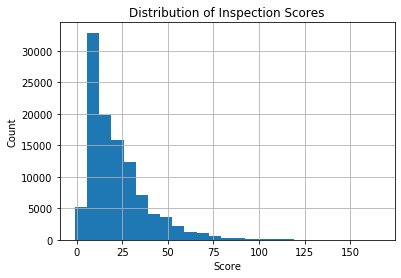

In [20]:
rest_inspect["SCORE"].hist(bins = 25)
plt.title("Distribution of Inspection Scores")
plt.xlabel("Score")
plt.ylabel("Count")
print(rest_inspect["SCORE"].mean())

2) Manhattan has the most restaurant inspections and Staten Island has the least restaurant inspections.

Text(0, 0.5, 'Count')

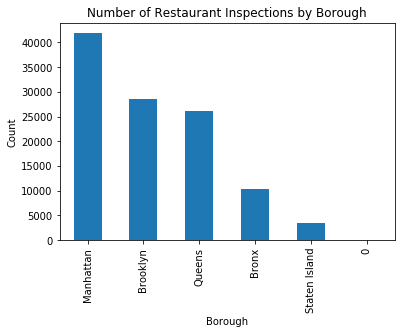

In [21]:
borough_counts = rest_inspect["BORO"].value_counts()
borough_counts.plot.bar()
plt.title("Number of Restaurant Inspections by Borough")
plt.xlabel("Borough")
plt.ylabel("Count")

3) The mean score does seem to depend on month. Maybe restaurants get more pests and rodents in the winter because of the cold. This would lower their score.

In [38]:
rest_inspect["GRADE DATE"] = pd.to_datetime(rest_inspect["GRADE DATE"])
jan_filter = rest_inspect["GRADE DATE"].dt.month == 1
jul_filter = rest_inspect["GRADE DATE"].dt.month == 7

In [49]:
print("January Mean Score: " + str(rest_inspect[jan_filter]["SCORE"].mean()) + "\n")
print("July Mean Score: " + str(rest_inspect[jul_filter]["SCORE"].mean()))

January Mean Score: 13.021619766643788

July Mean Score: 17.14229708145782


4)

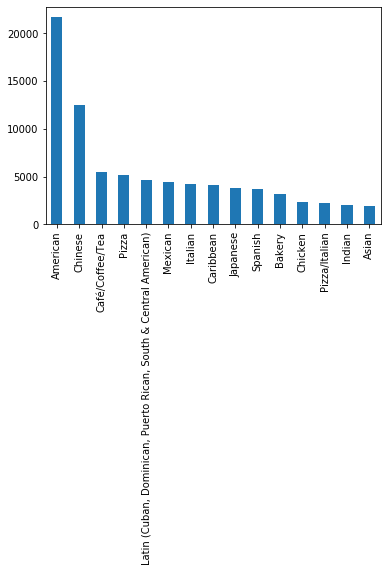

In [55]:
cuisine_counts = rest_inspect["CUISINE DESCRIPTION"].value_counts()
cuisine_counts = cuisine_counts.head(15)
cuisine_counts.plot.bar()

5) There are 84 different cuisine types in this dataset.

   The most common street is Broadway. 

In [56]:
cuisine_counts = rest_inspect["CUISINE DESCRIPTION"].value_counts()
len(cuisine_counts)

84

In [57]:
street_counts = rest_inspect["STREET"].value_counts()
street_counts.head(1)

BROADWAY    3805
Name: STREET, dtype: int64